In [23]:
import sys
import json
import yaml
import rosbag

#sys.path.append("/opt/ros/noetic/lib/python3/dist-packages")

bag = rosbag.Bag('full-lap.bag')
checkpoints = []


for topic, point, t in bag.read_messages(topics=['/F1ROS/odom']):
    checkpoints.append(point)

    
for topic, point, t in bag.read_messages(topics=['/metadata']):
    
    y = yaml.load(str(point), Loader=yaml.FullLoader)
    h = json.dumps(y,indent=4)
    data = json.loads(h)
    metadata = json.loads(data['data'])
    
print(metadata)
print(metadata['world'])
print(metadata['brain_path'])
print(metadata['robot_type'])
print(len(checkpoints))
bag.close()


{'world': 'f1_1_simplecircuit.launch', 'brain_path': 'brain_f1_opencv.py', 'robot_type': 'f1'}
f1_1_simplecircuit.launch
brain_f1_opencv.py
f1
3067


In [32]:
#for point in checkpoints:
#    print(point)
print(checkpoints[0])
print(type(checkpoints[0]))
y = yaml.load(str(checkpoints[0]), Loader=yaml.FullLoader)
print(y)
print(type(y))
print(y['header'])

header: 
  seq: 331
  stamp: 
    secs: 16
    nsecs: 931000000
  frame_id: "odom"
child_frame_id: "xf1"
pose: 
  pose: 
    position: 
      x: 53.461998161262045
      y: -10.734081361658387
      z: 0.0
    orientation: 
      x: 0.003688676544119534
      y: 0.0036380519485292103
      z: -0.7068167845186493
      w: 0.707377686505653
  covariance: [1e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1000000000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1000000000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1000000000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001]
twist: 
  twist: 
    linear: 
      x: -1.1263930887898282e-06
      y: -1.6808708682122744e-07
      z: 0.0
    angular: 
      x: 0.0
      y: 0.0
      z: 0.0
  covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
<class 'tmpb9p33954._nav_msgs__Odometry'>
{'header': {'seq': 331

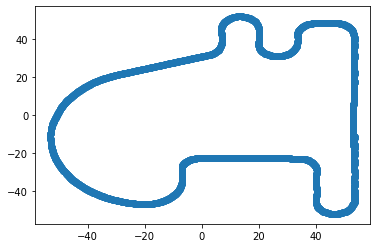

In [35]:
import numpy as np
import matplotlib.pyplot as plt

x_points = []
y_points = []

for point in checkpoints:
    point_yml = yaml.load(str(point), Loader=yaml.FullLoader)
    # print(point)
    x_points.append(point_yml['pose']['pose']['position']['x'])
    y_points.append(point_yml['pose']['pose']['position']['y'])


plt.scatter(x_points, y_points)
plt.show()

In [51]:
def finish_line(point_1, point_2):
    point_1_yml = yaml.load(str(point_1), Loader=yaml.FullLoader)
    point_2_yml = yaml.load(str(point_2), Loader=yaml.FullLoader)
    current_point = np.array([point_1_yml['pose']['pose']['position']['x'], point_1_yml['pose']['pose']['position']['y']])
    start_point = np.array([point_2_yml['pose']['pose']['position']['x'], point_2_yml['pose']['pose']['position']['y']])

    dist = (start_point - current_point) ** 2
    dist = np.sum(dist, axis=0)
    dist = np.sqrt(dist)
    if dist < 0.5:
        return True
    return False

def circuit_diameter(data):
    previous_point = []
    diameter = 0
    for i, point in enumerate(checkpoints):
        point_yml = yaml.load(str(point), Loader=yaml.FullLoader)
        current_point = np.array([point_yml['pose']['pose']['position']['x'], point_yml['pose']['pose']['position']['y']])
        if i is not 0:
            dist = (previous_point - current_point) ** 2
            dist = np.sum(dist, axis=0)
            dist = np.sqrt(dist)
            diameter += dist
            # distancia entre el punto y el anterior excepto en el primer punto que no hay. Esa distancia se suma.
        if point is lap_point:
            break
        previous_point = np.array([point_yml['pose']['pose']['position']['x'], point_yml['pose']['pose']['position']['y']])
    return diameter
        


# Find how many laps has the robot completed.
start_point = checkpoints[0]
start_point_yml = yaml.load(str(start_point), Loader=yaml.FullLoader)

for x, point in enumerate(checkpoints):
    point_yml = yaml.load(str(point), Loader=yaml.FullLoader)
    if x is not 0 and finish_line(point, start_point) and point_yml['header']['stamp']['secs'] - 10 > start_point_yml['header']['stamp']['secs']:
        lap_point = point
        
seconds_start = start_point_yml['header']['stamp']['secs']
lap_point_yml = yaml.load(str(lap_point), Loader=yaml.FullLoader)
seconds_end = lap_point_yml['header']['stamp']['secs']
lap_seconds = seconds_end - seconds_start

# TIME TO COMPLETE LAP
print('TIME TO COMPLETE LAP -> ' + str(lap_seconds) + ' s')            
# CIRCUIT LONGITUDE
print('LONGITUDE -> ' + str(circuit_diameter(data)) + ' m')
# AVERAGE SPEED
print('SPEED -> ' + str(circuit_diameter(data)/lap_seconds) + ' m/s')

TIME TO COMPLETE LAP -> 155 s
LONGITUDE -> 430.5358286112984 m
SPEED -> 2.777650507169667 m/s
